Answer to the second question in the HW, writing a notebook that plots 
$f(x)=\sin^2{\frac{1}{x(2-x)}}$ 
and its first derivative and second derivative.

In [1]:
from math import sin
from math import nan

In [2]:
def f(x):
    f=(sin(1/(x*(2-x)))**2)
    return f

In [3]:
import matplotlib.pyplot as plt

This follwing code plots calculates the function and its first and second derivatives within the interval [a,b], with a number of points N, these parameters could be changed according to the region of interest and the number of points needed for fine resolution of the graphs.

The domain of x is divided into 3 intervals to account for the discontinuities at x=0 and x=2, the function and its derivatives are calculated separately in each one of these 3 intervals and then each interval is plotted with a different color to enhance visualization. 

The code works for any input parameters a,b&N.

I used backward difference method in both 1st and 2nd derivatives to make dividing the intervals easy through if conditionals, I also defined them here and didn't use the functions in myder_modified file as defining them here makes it easier to implement partitioning the given [a,b] interval into 3 intervals.

The error in backward difference method is O(h^2), if more precision is needed then we can use the higher order backward difference formulas for all the needed derivatives. 

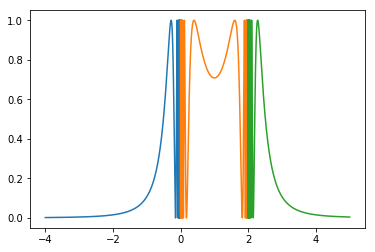

In [4]:
a=-4
b=5
N=100000

xa=[]         #interval a = (-inf,0)
xb=[]         #interval b = [0,2)
xc=[]         #interval c = [2,inf)
ya=[]
yb=[]
yc=[]
y1a=[]
y1b=[]
y1c=[]
y2a=[]
y2b=[]
y2c=[]

def backwardiff(f,a,b,N,i):
    h = (b-a)/N
    f1=(f(a+i*h)-f(a+(i-1)*h))/h
    return f1

def backward_second_der(f,a,b,N,i):
    h = (b-a)/N
    f2=(f(a+i*h)-2*f(a+(i-1)*h)+f(a+(i-2)*h))/(h**2)
    return f2

for i in range(0,N):
    xi=a+i*(b-a)/N
    if(xi<0):      #this means that xi and x(i-1) and x(i-2) are in interval (a) 
        xa.append(xi)
        yi=f(xi)
        ya.append(yi)
        y1i=backwardiff(f,a,b,N,i)
        y1a.append(y1i)
        y2i=backward_second_der(f,a,b,N,i)
        y2a.append(y2i)
    if((xi==0) or (xi>0 and xi-2*(b-a)/N<=0)):  # this means that xi is in interval (b) while x(i-2) is in interval (a) 
        xb.append(xi)
        yb.append(nan)
        y1b.append(nan)
        y2b.append(nan)
    if(xi<2 and xi-2*(b-a)/N>0):      # all xi, x(i-1) and x(i-2) are in interval (b)
        xb.append(xi)
        yi=f(xi)
        yb.append(yi)
        y1i=backwardiff(f,a,b,N,i)
        y1b.append(y1i)
        y2i=backward_second_der(f,a,b,N,i)
        y2b.append(y2i)
    if((xi==2) or (xi>2 and xi-2*(b-a)/N<=2)):        # xi is in interval (c) but x(i-2) is in interval b
        xc.append(xi)
        yc.append(nan)
        y1c.append(nan)
        y2c.append(nan)
    if(xi-2*(b-a)/N>2):              # all xi, x(i-1) and x(i-2) are in interval c 
        xc.append(xi)
        yi=f(xi)
        yc.append(yi)
        y1i=backwardiff(f,a,b,N,i)
        y1c.append(y1i)
        y2i=backward_second_der(f,a,b,N,i)
        y2c.append(y2i)

    
plt.plot(xa,ya)
plt.plot(xb,yb)
plt.plot(xc,yc)

[-1, 3, -10, 10]

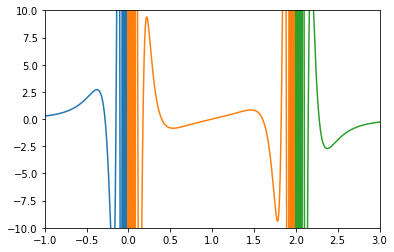

In [5]:
plt.plot(xa,y1a)
plt.plot(xb,y1b)
plt.plot(xc,y1c)
plt.axis([-1,3,-10,10])

[-1, 3, -100, 100]

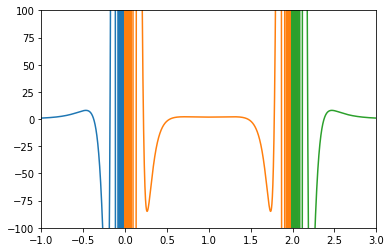

In [6]:
plt.plot(xa,y2a)
plt.plot(xb,y2b)
plt.plot(xc,y2c)
plt.axis([-1,3,-100,100])